In [435]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [436]:
df = pd.read_csv('./crypto-markets.csv')

In [437]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [438]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date2num'] = df['date'].apply(lambda x: mdates.date2num(x))

In [439]:
Bitcoin = df[df['name']=='Bitcoin']

Let take a look about bitcoin price over years.

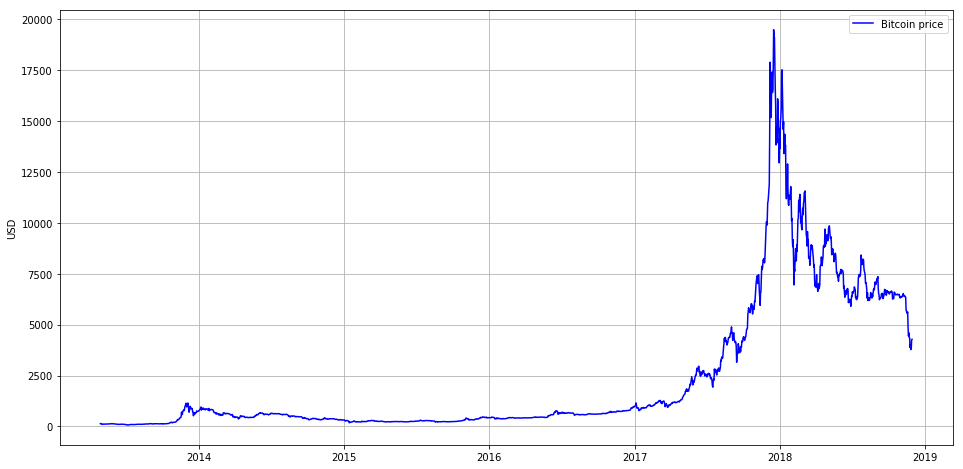

In [440]:
plt.figure(figsize=(16,8))
plt.plot_date(Bitcoin['date'], Bitcoin['close'], fmt='b-', xdate=True, ydate=False, label='Bitcoin price') 
plt.ylabel('USD')
plt.legend()
plt.grid()
plt.show()

It clearly can be seen that the trend really start from year 2017. So we will focuse in year 2017 and later.

In [441]:
data = df[df['date'] >= '2018']

In [442]:
data[data['ranknow'] <= 10].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2              [XRP]
3         [Ethereum]
4          [Stellar]
5     [Bitcoin Cash]
6              [EOS]
7         [Litecoin]
8           [Tether]
9       [Bitcoin SV]
10         [Cardano]
Name: name, dtype: object

In [443]:
Bitcoin = data[data['name']=='Bitcoin']
XRP = data[data['name']=='XRP']
Ethereum = data[data['name']=='Ethereum']
Stellar = data[data['name']=='Stellar']
Bitcoin_Cash = data[data['name']=='Bitcoin Cash']

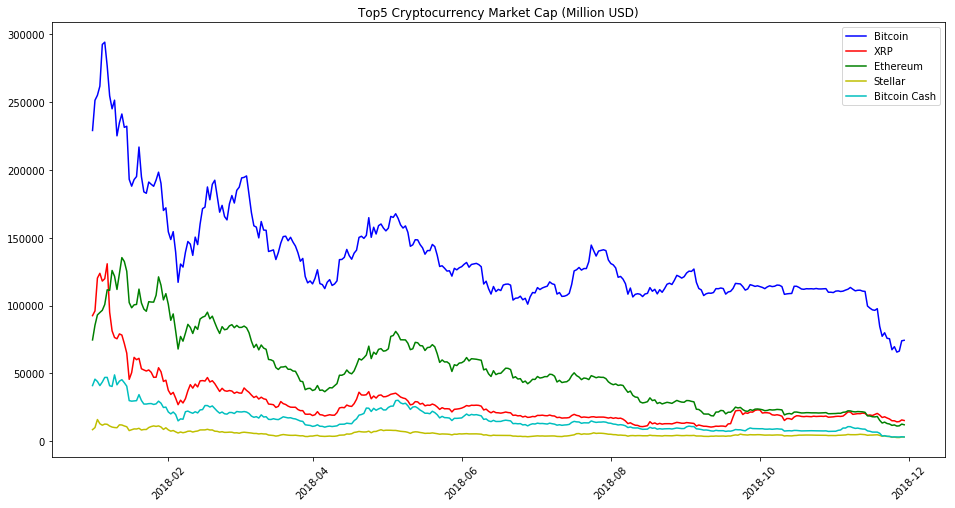

In [444]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.plot_date(Bitcoin['date'], Bitcoin['market']/1000000, fmt='b-', xdate=True, ydate=False, label='Bitcoin')
plt.plot_date(XRP['date'], XRP['market']/1000000, fmt='r-', xdate=True, ydate=False, label='XRP') 
plt.plot_date(Ethereum['date'], Ethereum['market']/1000000, fmt='g-', xdate=True, ydate=False, label='Ethereum') 
plt.plot_date(Stellar['date'], Stellar['market']/1000000, fmt='y-', xdate=True, ydate=False, label='Stellar') 
plt.plot_date(Bitcoin_Cash['date'], Bitcoin_Cash['market']/1000000, fmt='c-', xdate=True, ydate=False, label='Bitcoin Cash') 

plt.legend()
plt.title('Top5 Cryptocurrency Market Cap (Million USD)')
plt.show()

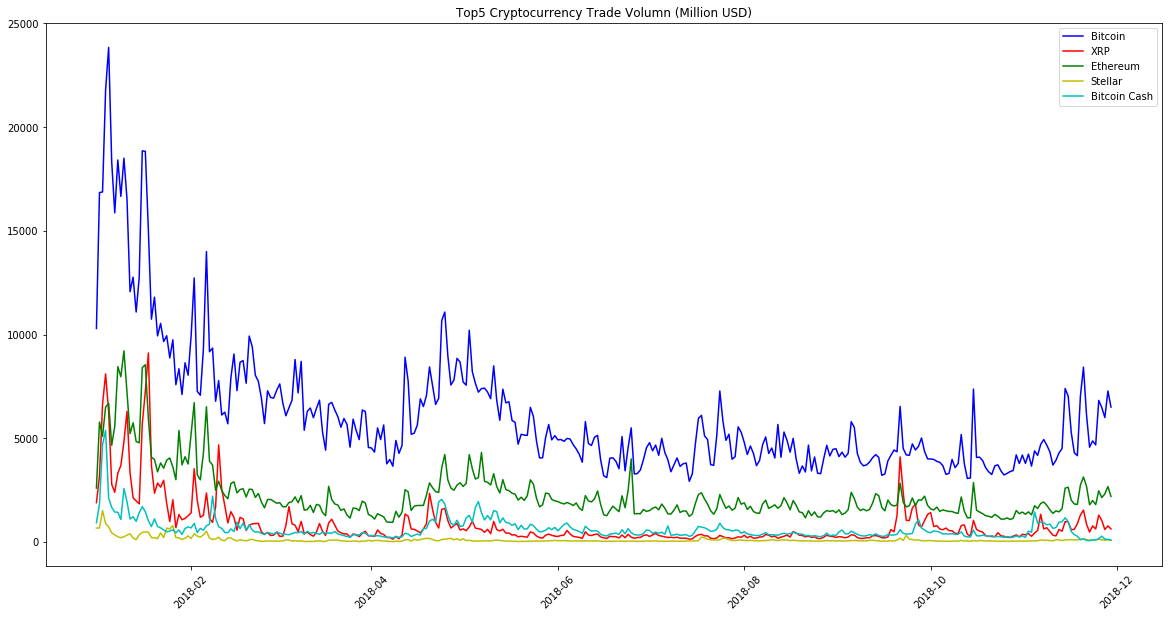

In [445]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot_date(Bitcoin['date'], Bitcoin['volume']/1000000, fmt='b-', xdate=True, ydate=False, label='Bitcoin')
plt.plot_date(XRP['date'], XRP['volume']/1000000, fmt='r-', xdate=True, ydate=False, label='XRP') 
plt.plot_date(Ethereum['date'], Ethereum['volume']/1000000, fmt='g-', xdate=True, ydate=False, label='Ethereum') 
plt.plot_date(Stellar['date'], Stellar['volume']/1000000, fmt='y-', xdate=True, ydate=False, label='Stellar') 
plt.plot_date(Bitcoin_Cash['date'], Bitcoin_Cash['volume']/1000000, fmt='c-', xdate=True, ydate=False, label='Bitcoin Cash') 

plt.legend()
plt.title('Top5 Cryptocurrency Trade Volumn (Million USD)')
plt.show()

In [446]:
Bitcoin_data = Bitcoin.set_index('date')
XRP_data = XRP.set_index('date')
Ethereum_data = Ethereum.set_index('date')
Stellar_data = Stellar.set_index('date')
Bitcoin_Cash_data  = Bitcoin_Cash.set_index('date')

In [447]:
btc = Bitcoin_data[['close']]
btc.columns = ['BTC']

xrp = XRP_data[['close']]
xrp.columns = ['XRP']

eth = Ethereum_data[['close']]
eth.columns = ['ETH']

xlm = Stellar_data[['close']]
xlm.columns = ['XLM']

bch = Bitcoin_Cash_data[['close']]
bch.columns = ['BCH']

close = pd.concat([btc,xrp,eth,xlm,bch], axis=1, join='inner')

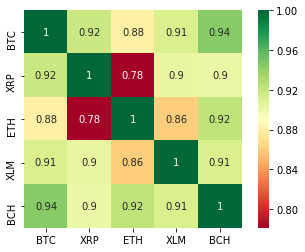

In [448]:
sns.heatmap(close.corr(), annot=True, cmap="RdYlGn", square=True)

In [449]:
close.index.values[0]

numpy.datetime64('2018-01-01T00:00:00.000000000')

In [450]:
close.index.values[len(close)-1]

numpy.datetime64('2018-11-29T00:00:00.000000000')

In [451]:
coins_get = (5000/close.iloc[0]).round(3)
coins_get

BTC        0.366
XRP     2092.050
ETH        6.471
XLM    10416.493
BCH        2.055
Name: 2018-01-01 00:00:00, dtype: float64

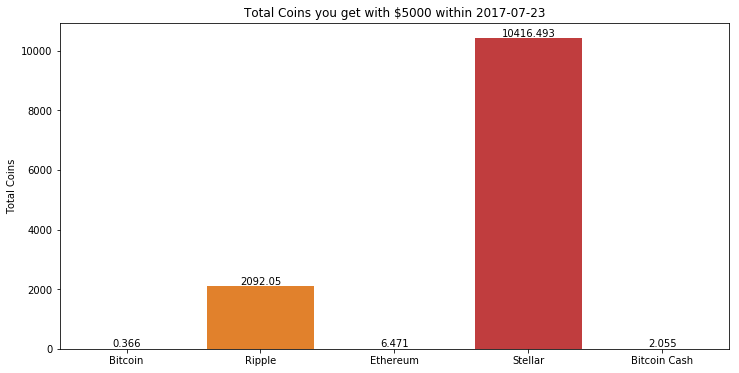

In [452]:
f = plt.figure(figsize=(12,6))
ax = sns.barplot(['Bitcoin','Ripple','Ethereum','Stellar','Bitcoin Cash'],coins_get.values)
plt.title('Total Coins you get with $5000 within 2017-07-23')
plt.ylabel('Total Coins')
rects = ax.patches
labels = coins_get.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')
plt.show()

In [453]:
value_earn = coins_get * close.tail(1)
value_earn = value_earn.stack()
value_earn.index = value_earn.index.droplevel(0)

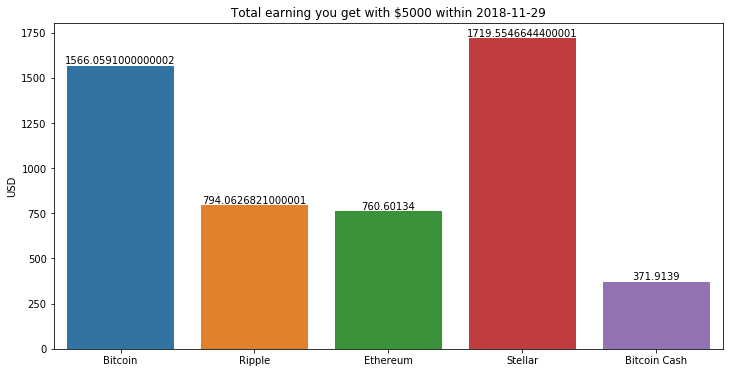

In [454]:
f = plt.figure(figsize=(12,6))
ax = sns.barplot(['Bitcoin','Ripple','Ethereum','Stellar','Bitcoin Cash'], value_earn)
plt.title('Total earning you get with $5000 within 2018-11-29')
plt.ylabel('USD')
rects = ax.patches
labels = value_earn.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), label, ha='center', va='bottom')
plt.show()

In [455]:
Bitcoin.drop(['slug','symbol','name','ranknow'],axis=1,inplace=True)
Bitcoin.dropna(inplace=True)

C:\Users\KHOA\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\KHOA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [456]:
Bitcoin.head()
Bitcoin = Bitcoin.reset_index(level=0, drop=True)

In [457]:
from sklearn.model_selection import train_test_split
X = Bitcoin[['open','high','low','date2num']]
y = Bitcoin['close']

nrow , ncol = Bitcoin.shape

In [458]:
X_test = X.loc[:np.floor(nrow*0.3)]
X_train = X.loc[np.floor(nrow*0.3)+1:]

In [459]:
y_test = y.loc[:np.floor(nrow*0.3)]
y_train = y.loc[np.floor(nrow*0.3)+1:]

In [460]:
date_test = Bitcoin[['date']].loc[:np.floor(nrow*0.3)]
date_train = Bitcoin[['date']].loc[np.floor(nrow*0.3)+1:]

In [461]:
def plot_stock(date, outcome, prediction=None):
    # your code here
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    plt.plot_date(date, outcome, fmt='b-', xdate=True, ydate=False, label='Real value')
    if prediction is not None:
        plt.plot_date(date, prediction, fmt='r-', xdate=True, ydate=False, label='prediction')
    plt.ylabel('Close prices')
    plt.title('Vingroup - VIC')
    plt.legend()
    plt.grid()
    plt.show()
    return

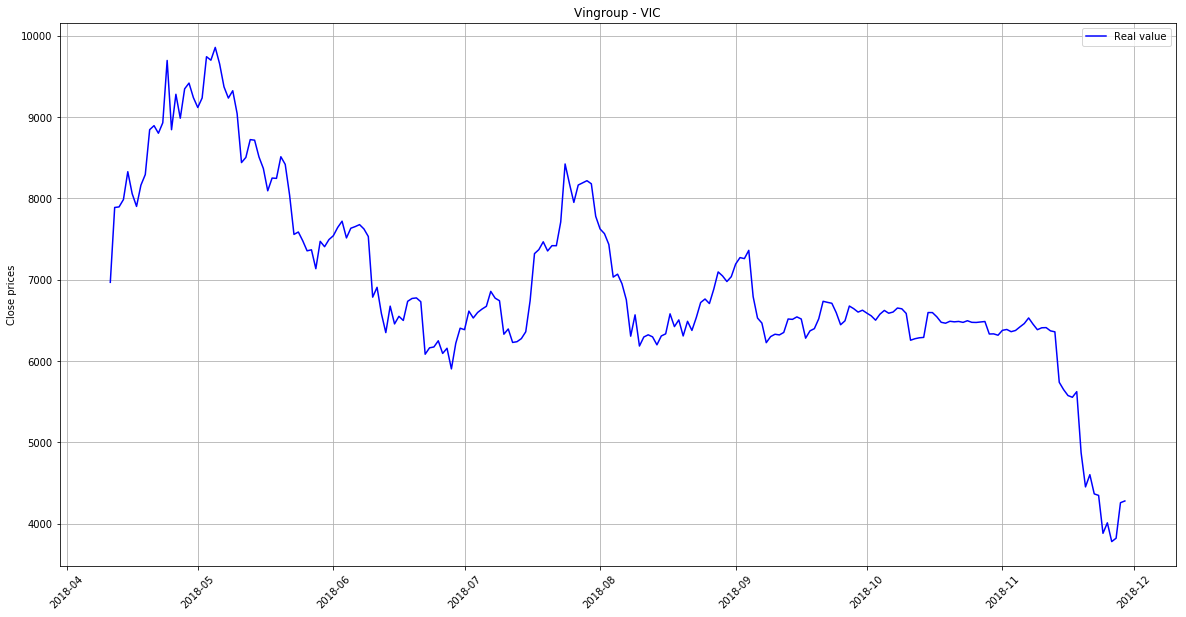

In [462]:
plot_stock(date_train, y_train)

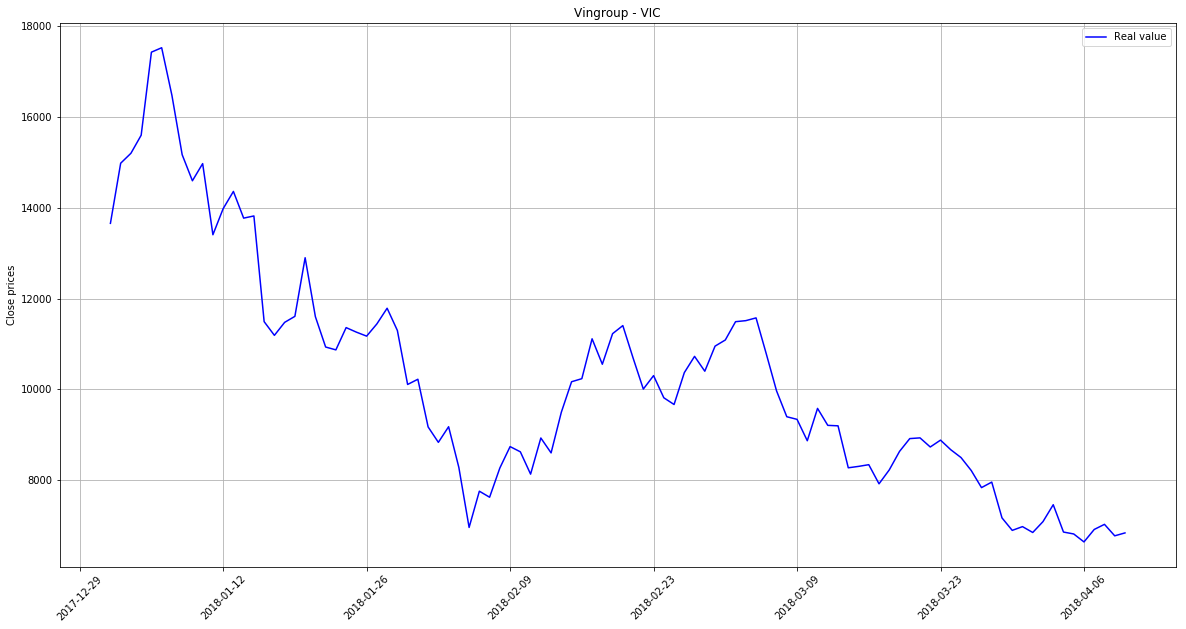

In [463]:
plot_stock(date_test, y_test)

In [464]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [465]:
print(lm.coef_)
print(lm.intercept_)

[-0.73040225  0.87436618  0.85467824 -0.09453853]
69679.68908488727


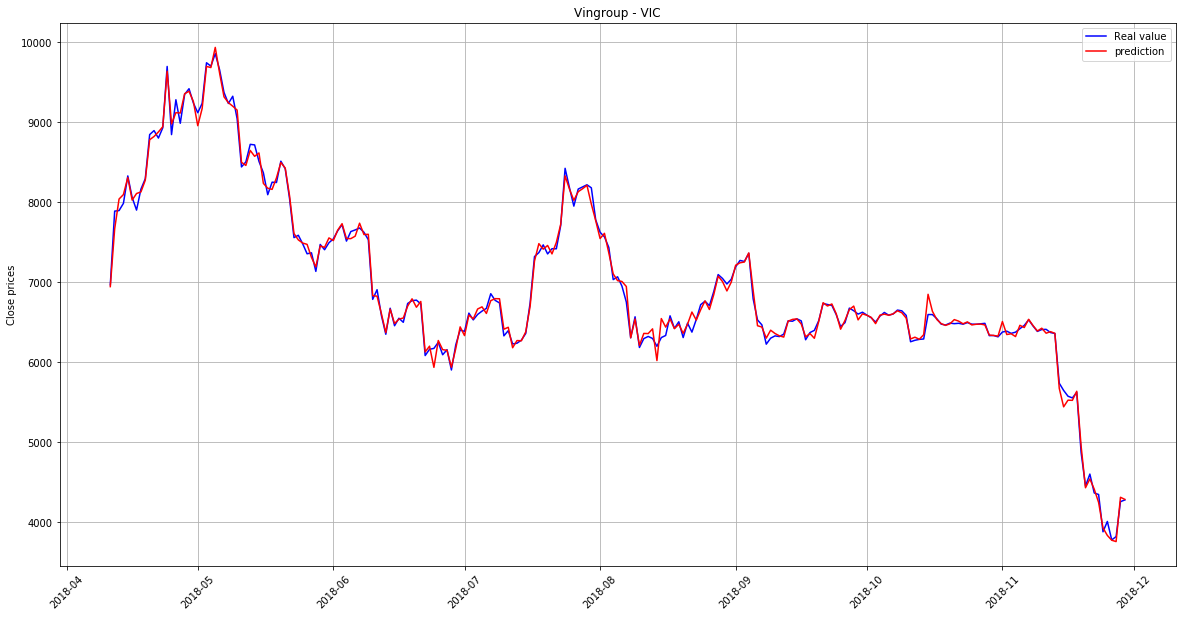

In [466]:
predictions_train = lm.predict(X_train)
plot_stock(date_train, y_train, predictions_train)

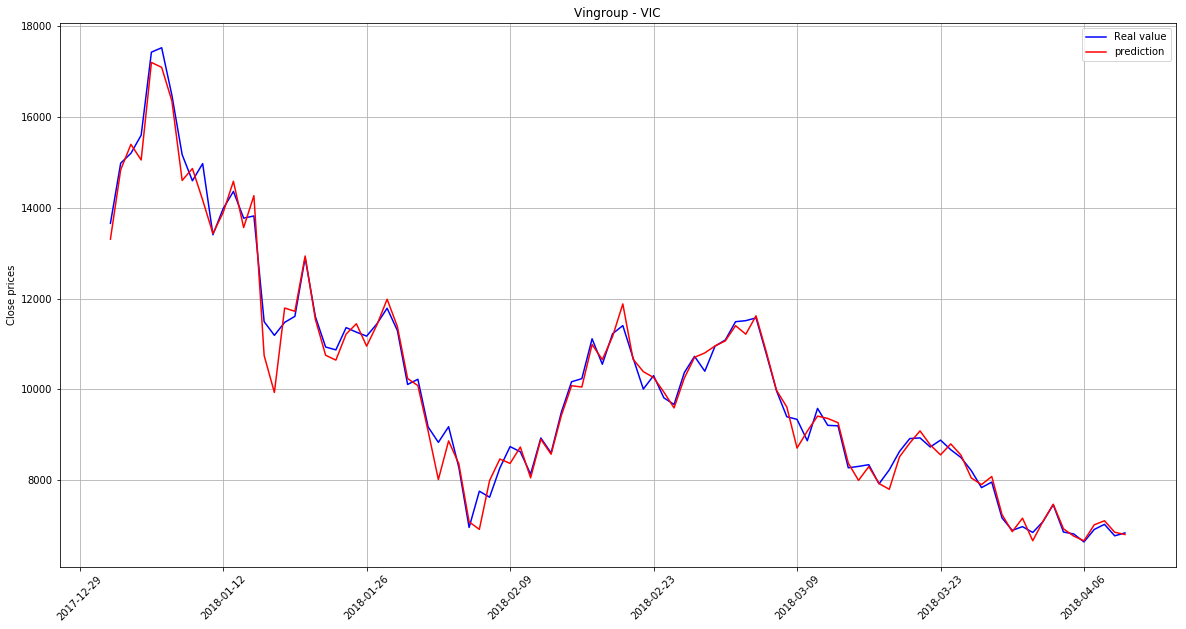

In [467]:
predictions_test = lm.predict(X_test)
plot_stock(date_test, y_test, predictions_test)

In [468]:
Bitcoin['pos/edge'] = np.float64()
Bitcoin['Volumn pos/edge'] = np.float64()
for i in range(len(Bitcoin)-1):
    Bitcoin['pos/edge'][i] = Bitcoin['open'].iloc[i+1] - Bitcoin['close'].iloc[i]
    Bitcoin['Volumn pos/edge'][i] = Bitcoin['volume'].iloc[i+1] - Bitcoin['volume'].iloc[i]
#Bitcoin = Bitcoin.drop(697)
Bitcoin = Bitcoin.drop(332)

C:\Users\KHOA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\KHOA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [469]:
Bitcoin.tail()

,date,open,high,low,close,volume,market,close_ratio,spread,date2num,pos/edge,Volumn pos/edge
327,2018-11-24,4347.69,4413.09,3795.16,3880.76,4.679500e+09,6.749563e+10,0.1385,617.93,737022.0,0.02,2.146140e+09
328,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81,737023.0,5.10,-3.487400e+08
329,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22,737024.0,-13.18,-4.781800e+08
330,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95,737025.0,1.75,1.281560e+09
331,2018-11-28,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43,737026.0,11.58,-7.769322e+08


In [425]:
Bitcoin['Up/Down'] = np.where(Bitcoin['pos/edge']>0, '0', '1')

In [426]:
Bitcoin.tail()

,date,open,high,low,close,volume,market,close_ratio,spread,date2num,pos/edge,Up/Down
327,2018-11-24,4347.69,4413.09,3795.16,3880.76,4.679500e+09,6.749563e+10,0.1385,617.93,737022.0,0.02,0
328,2018-11-25,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81,737023.0,5.10,0
329,2018-11-26,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22,737024.0,-13.18,1
330,2018-11-27,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95,737025.0,1.75,0
331,2018-11-28,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43,737026.0,11.58,0


In [427]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create model
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [428]:
from sklearn.model_selection import train_test_split
X = Bitcoin[['open','volume','market','date2num']]
y = Bitcoin['Up/Down']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [429]:
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)

C:\Users\KHOA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [430]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction_rfc = rfc.predict(X_test)
accuracy_score(y_test,prediction_rfc)

0.45

In [431]:
prediction_dtc = dtc.predict(X_test)
accuracy_score(y_test,prediction_dtc)


0.44

In [432]:
print('accuracy:',accuracy_score(y_test,prediction_dtc))
print('confusion matrix:\n',confusion_matrix(y_test,prediction_dtc))
print('classification report:\n',classification_report(y_test,prediction_dtc))

accuracy: 0.44
confusion matrix:
 [[33 21]
 [35 11]]
classification report:
               precision    recall  f1-score   support

           0       0.49      0.61      0.54        54
           1       0.34      0.24      0.28        46

   micro avg       0.44      0.44      0.44       100
   macro avg       0.41      0.43      0.41       100
weighted avg       0.42      0.44      0.42       100



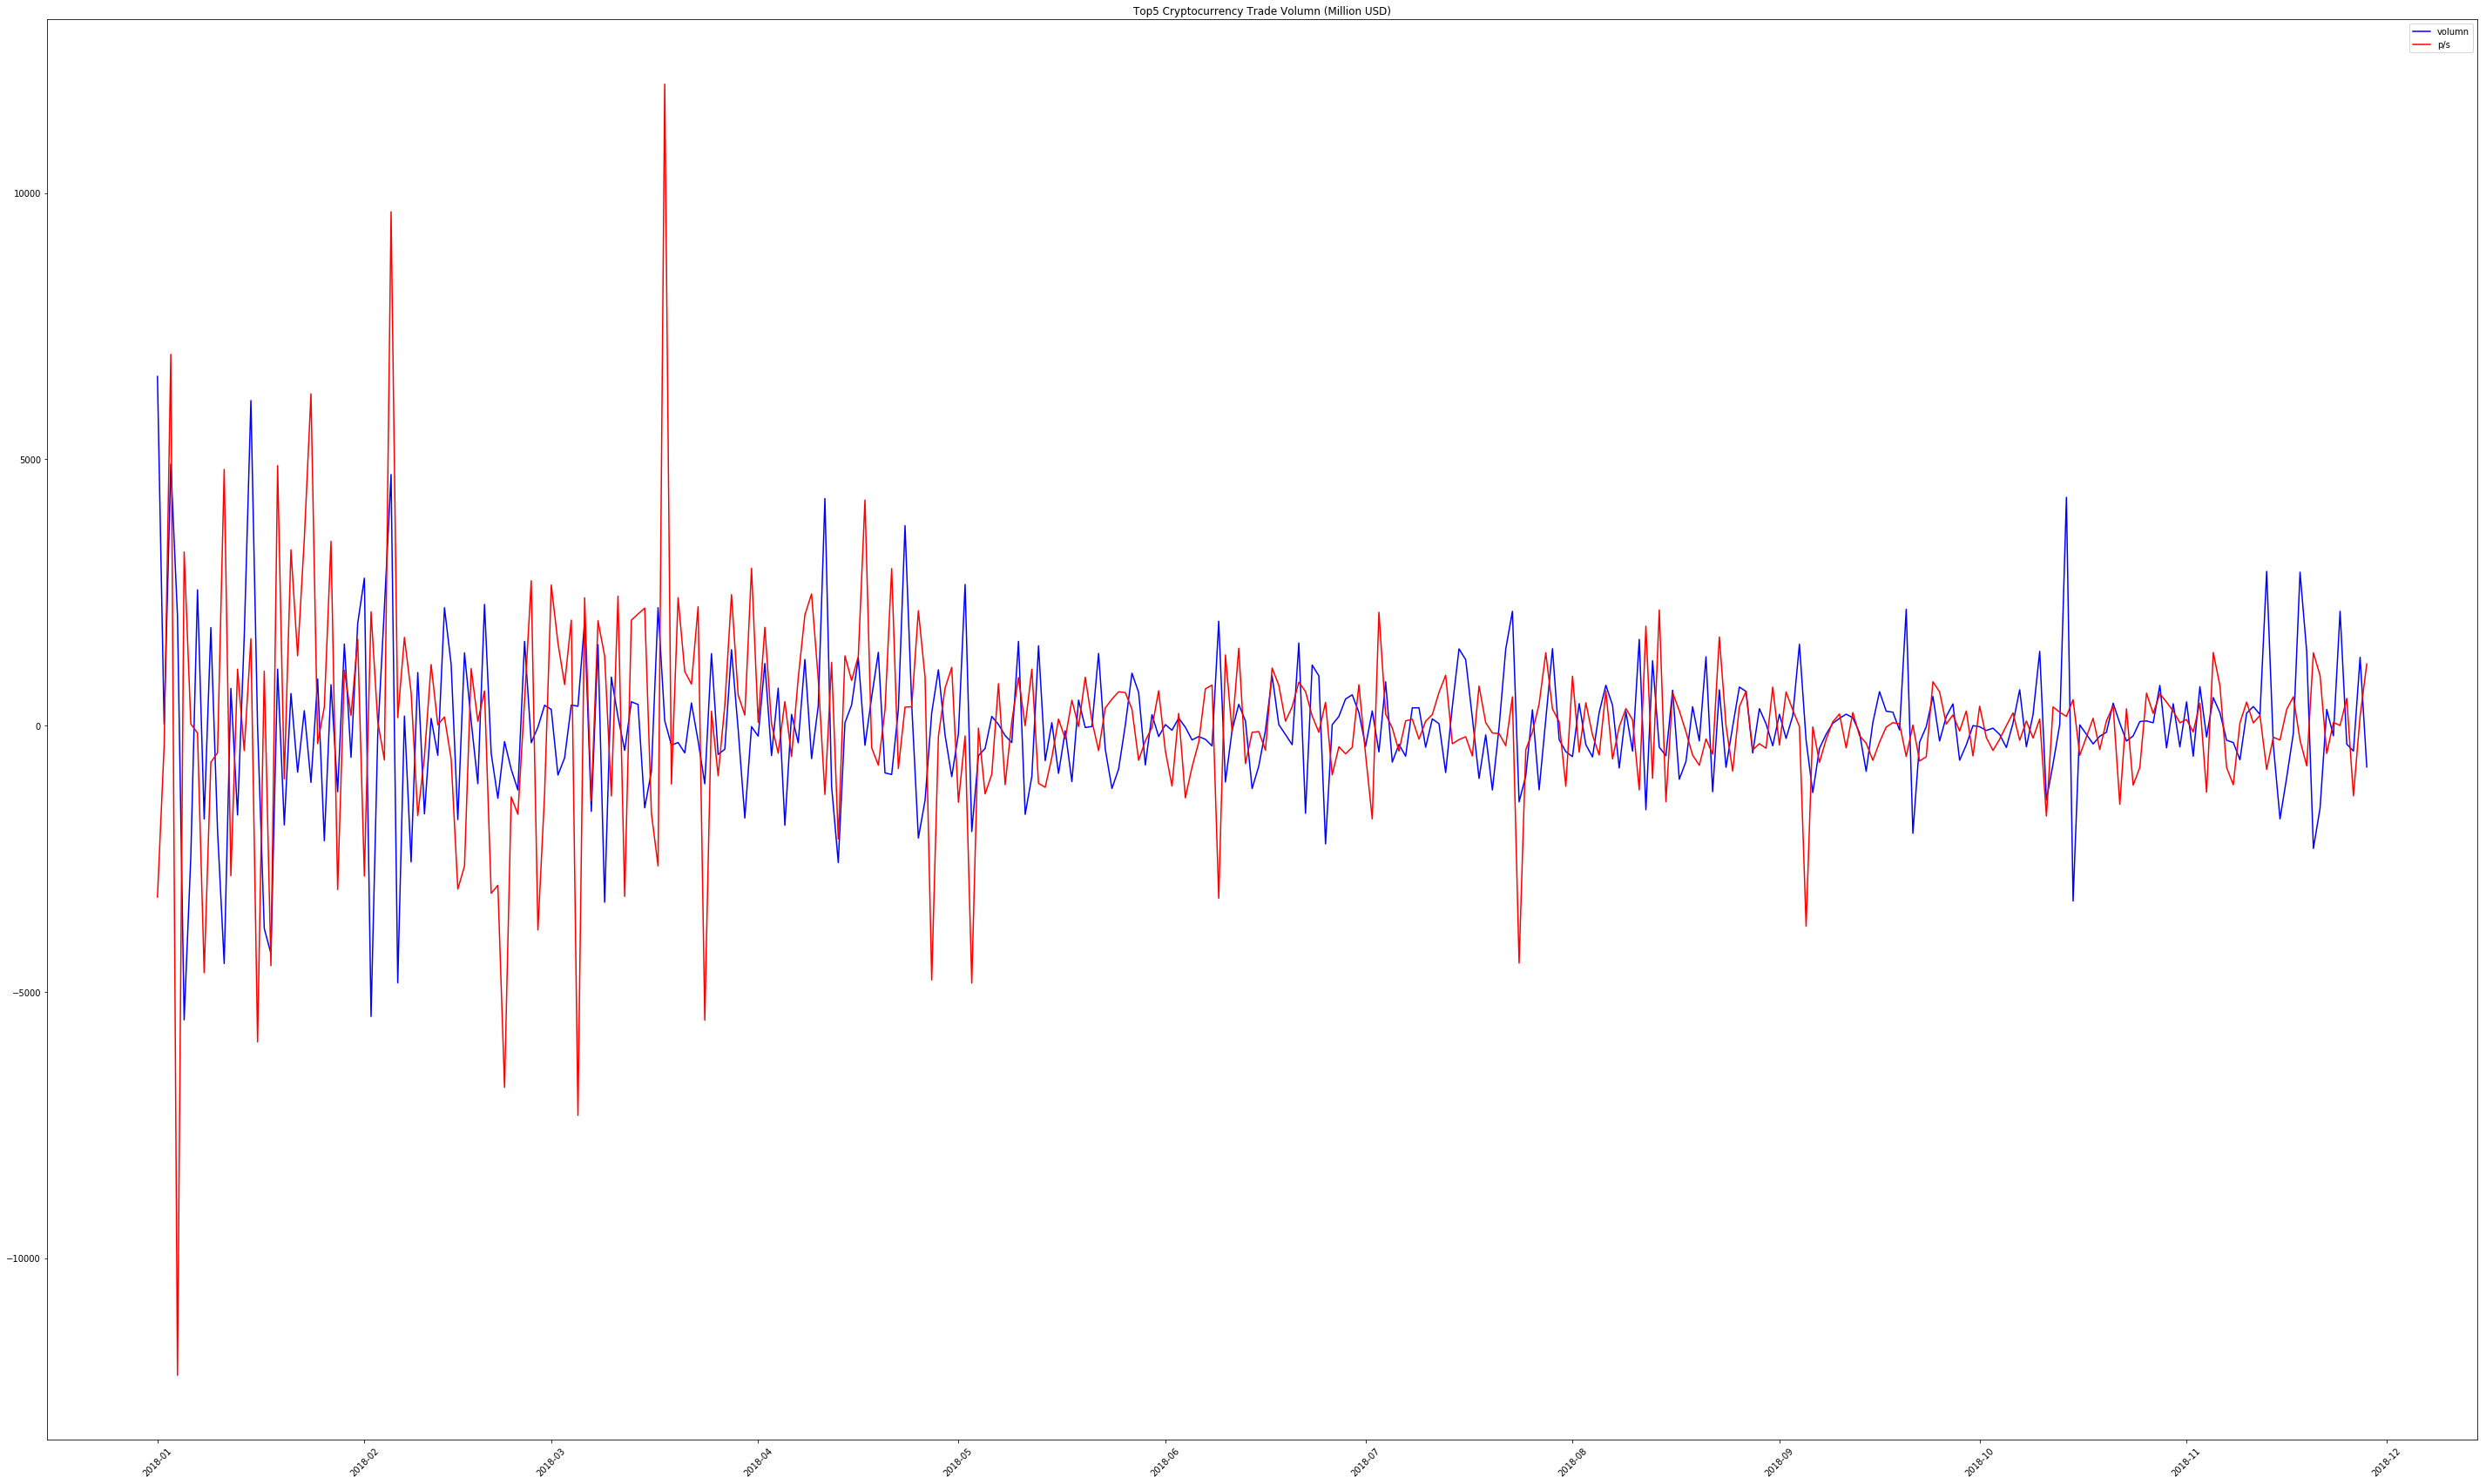

In [477]:
plt.figure(figsize=(50,30))
plt.xticks(rotation=45)
plt.plot_date(Bitcoin['date'], Bitcoin['Volumn pos/edge']/1000000, fmt='b-', xdate=True, ydate=False, label='volumn')
plt.plot_date(Bitcoin['date'], Bitcoin['pos/edge']*100, fmt='r-', xdate=True, ydate=False, label='p/s') 

plt.legend()
plt.title('Top5 Cryptocurrency Trade Volumn (Million USD)')
plt.show()

In [434]:
Bitcoin.head()

,date,open,high,low,close,volume,market,close_ratio,spread,date2num,pos/edge,Up/Down
0,2018-01-01,14112.2,14112.2,13154.7,13657.2,1.029120e+10,2.291192e+11,0.5248,957.5,736695.0,-32.2,1
1,2018-01-02,13625.0,15444.6,13163.6,14982.1,1.684660e+10,2.513779e+11,0.7972,2281.0,736696.0,-3.9,1
2,2018-01-03,14978.2,15572.8,14844.5,15201.0,1.687190e+10,2.550806e+11,0.4895,728.3,736697.0,69.7,0
3,2018-01-04,15270.7,15739.7,14522.2,15599.2,2.178320e+10,2.617953e+11,0.8846,1217.5,736698.0,-122.0,1
4,2018-01-05,15477.2,17705.2,15202.8,17429.5,2.384090e+10,2.925441e+11,0.8898,2502.4,736699.0,32.6,0
